
# 💤 Sleep Health and Lifestyle Analysis 💤

Sleep plays a crucial role in physical and mental well-being. Poor sleep habits are often linked to stress, lifestyle choices and health conditions such as insomnia and sleep apnea.

In this notebook, we analyze a sleep health and lifestyle dataset to:
- Explore relationships between sleep, lifestyle, and health metrics
- Perform exploratory data analysis (EDA)
- Build a machine learning model to predict the presence of sleep disorders


## Dataset Overview

The dataset contains information about individuals' sleep habits, lifestyle factors and health indicators such as:
- Sleep duration and quality
- Physical activity and stress levels
- Heart rate and blood pressure
- Presence of sleep disorders

The goal is to understand which factors contribute most to sleep disorders.


In [314]:
#Import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score,roc_curve

## 1. Initial Data Exploration



In [315]:
#Loading the dataset
df=pd.read_csv("/content/Sleep_health_and_lifestyle_dataset.csv")

In [316]:
shape= df.shape   #Gives the dimension of the dataset
print('The dimention of data is :',shape)

The dimention of data is : (374, 13)


In [317]:
df.head() #Prints first 5 entries of the dataset

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [318]:
df.info() #overall information about datatype in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [319]:
df.describe() #statistical information of the dataset

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [320]:
df.nunique() #number of unique values in each column

,0
Person ID,374
Gender,2
Age,31
Occupation,11
Sleep Duration,27
Quality of Sleep,6
Physical Activity Level,16
Stress Level,6
BMI Category,4
Blood Pressure,25


## 2. Data Cleaning and Preprocessing



In [321]:
print(df.isna().sum())

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


**Note:** There are 219 NaN for Sleep Disorder column. They are filled with None to indicate No Sleep Disorder

In [322]:
df['Sleep Disorder']= df["Sleep Disorder"].fillna('None') #Fills NaN with 'None'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


Split the `Blood Pressure` column into- Systolic Blood Pressure and Diastolic Blood Pressure

In [323]:
df[["Systolic_BP", "Diastolic_BP"]] = df["Blood Pressure"].str.split("/", expand=True)
df["Systolic_BP"] = df["Systolic_BP"].astype(int)
df["Diastolic_BP"] = df["Diastolic_BP"].astype(int)
df.drop(columns=["Blood Pressure"], inplace=True)

In [324]:
print("The columns are:", df.columns)

The columns are: Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Heart Rate', 'Daily Steps', 'Sleep Disorder',
       'Systolic_BP', 'Diastolic_BP'],
      dtype='object')


In [325]:
#Prints the unique entries of column
print(df['BMI Category'].unique())
df["BMI Category"] = df["BMI Category"].replace("Normal Weight", "Normal")
print(df["BMI Category"].value_counts())


['Overweight' 'Normal' 'Obese' 'Normal Weight']
BMI Category
Normal        216
Overweight    148
Obese          10
Name: count, dtype: int64


In [326]:
print(df['Sleep Disorder'].unique())

['None' 'Sleep Apnea' 'Insomnia']


## 3. Exploratory Data Analysis (EDA)

### Distribution of Numerical Features
Box plots are used to visualize outliers

###Categorical Feature Analysis
Count plots help visualize Class distribution and Imbalances in categorical variables




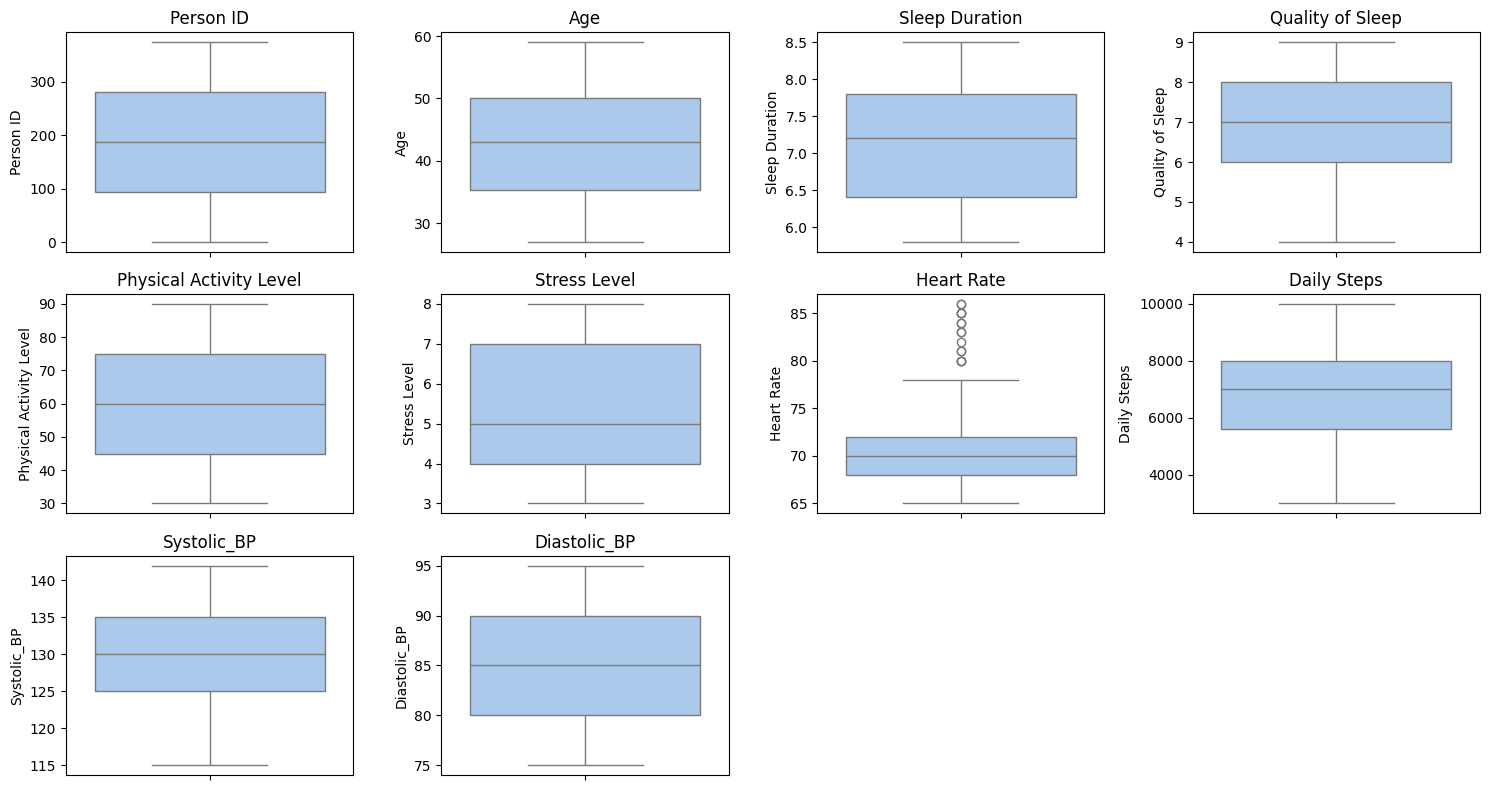

In [327]:
#Box Plot of the numeric columns
num_cols = df.select_dtypes(include='number').columns

sns.set_palette("pastel")
plt.figure(figsize=(15, 8))

for i, col in enumerate(num_cols):
    plt.subplot(3, 4, i + 1)   # 3 rows, 4 columns
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

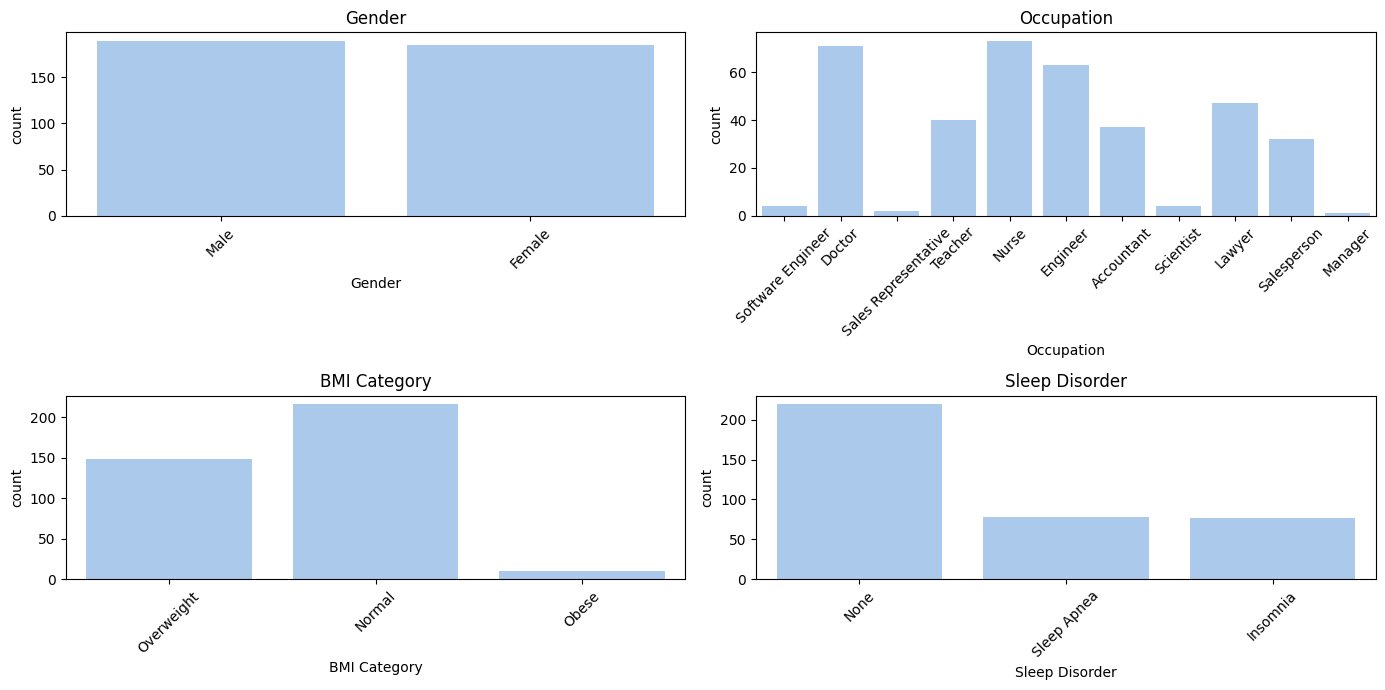

In [328]:
#Count plot of all the categorical features

cat_cols = df.select_dtypes(include='object').columns

sns.set_palette("pastel")
plt.figure(figsize=(14, 7))

for i, col in enumerate(cat_cols):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=df[col])
    plt.title(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Target Variable Creation

The original dataset contains three sleep disorder categories: None, Insomnia and Sleep Apnea

For modeling purposes, insomnia and sleep apnea are combined into a single class:
- `0` → No sleep disorder
- `1` → Presence of a sleep disorder

This simplifies the problem into a binary classification task.


Sleep_Disorder_Binary
0    219
1    155
Name: count, dtype: int64


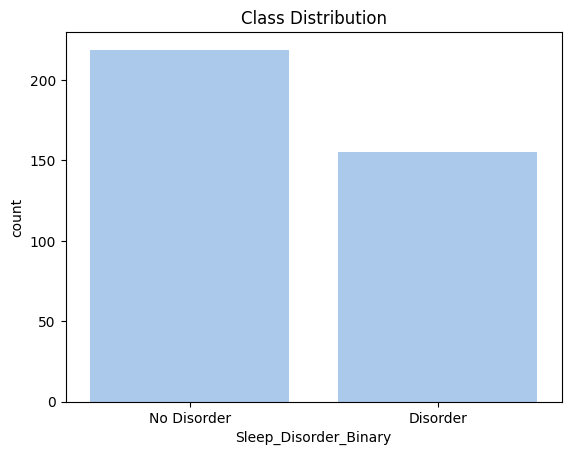

In [329]:
#Convert sleep apnea and insomnia to class of sleep disorders
df["Sleep_Disorder_Binary"] = df["Sleep Disorder"].map({
    "None": 0,
    "Insomnia": 1,
    "Sleep Apnea": 1
})
print(df["Sleep_Disorder_Binary"].value_counts())
sns.set_palette("pastel")
sns.countplot(x="Sleep_Disorder_Binary", data=df)
plt.xticks([0,1], ["No Disorder", "Disorder"])
plt.title("Class Distribution")
plt.show()

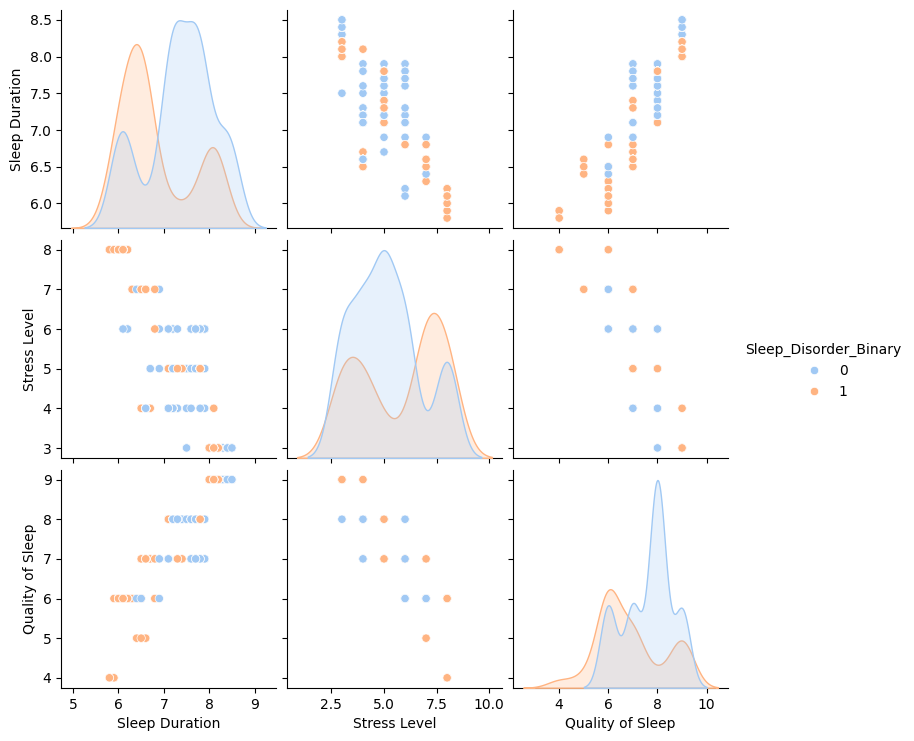

In [330]:
sns.set_palette("pastel")
sns.pairplot(
    df,
    vars=["Sleep Duration", "Stress Level", "Quality of Sleep"],
    hue="Sleep_Disorder_Binary"
)
plt.show()

**Observation:** Pairplot shows that individuals with sleep disorders generally have lower sleep duration and sleep quality, while stress levels tend to be higher compared to individuals without disorders.

### Correlation Analysis


A correlation heatmap is used to examine relationships between numerical features.


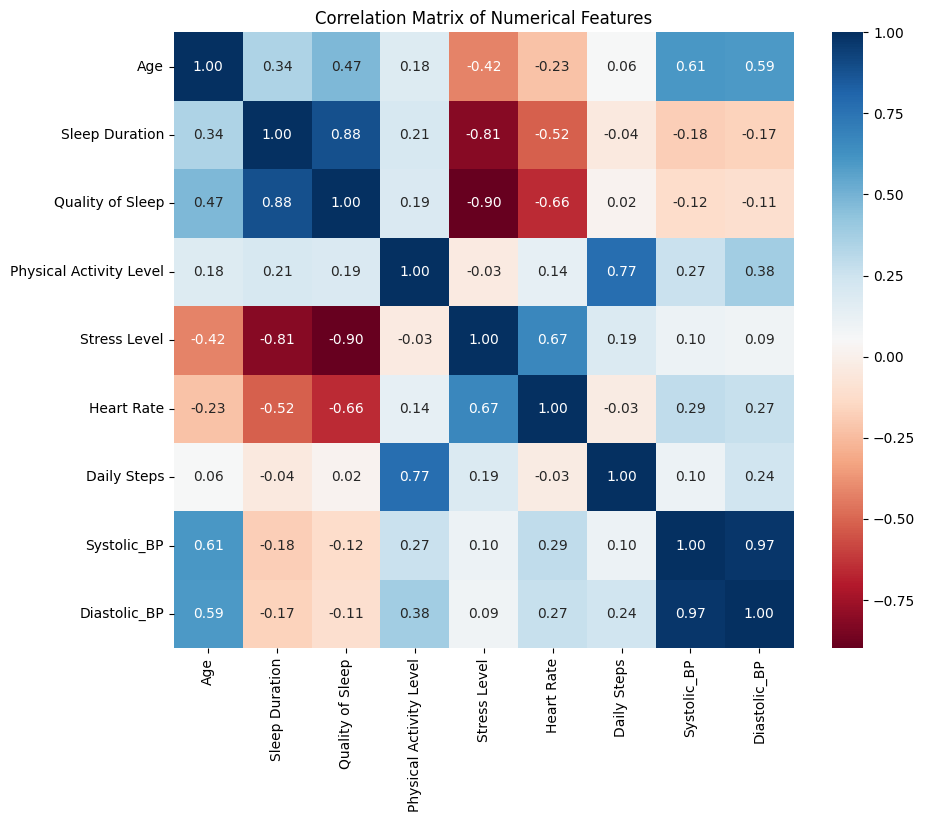

In [331]:
#Correlation matrix of the numeric features
numeric_features = [
    "Age",
    "Sleep Duration",
    "Quality of Sleep",
    "Physical Activity Level",
    "Stress Level",
    "Heart Rate",
    "Daily Steps",
    "Systolic_BP",
    "Diastolic_BP"
]
corr_matrix = df[numeric_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="RdBu")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

## 4. Model Building and Evaluation
Logistic Regression Model is used for binary classification

In [332]:
#Features selected for the model
features = [
    "Age",
    "Sleep Duration",
    "Quality of Sleep",
    "Physical Activity Level",
    "Stress Level",
    "Heart Rate",
    "Daily Steps",
    "BMI Category",
    "Gender",
    "Systolic_BP",
    "Diastolic_BP"
]

X = df[features]
y = df["Sleep_Disorder_Binary"]

In [333]:
X = pd.get_dummies(X, columns=["Gender", "BMI Category"], drop_first=True)
X.dtypes

,0
Age,int64
Sleep Duration,float64
Quality of Sleep,int64
Physical Activity Level,int64
Stress Level,int64
Heart Rate,int64
Daily Steps,int64
Systolic_BP,int64
Diastolic_BP,int64
Gender_Male,bool


In [334]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

# scale after split
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [335]:
# Train
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.9466666666666667
[[41  2]
 [ 2 30]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.94      0.94      0.94        32

    accuracy                           0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75



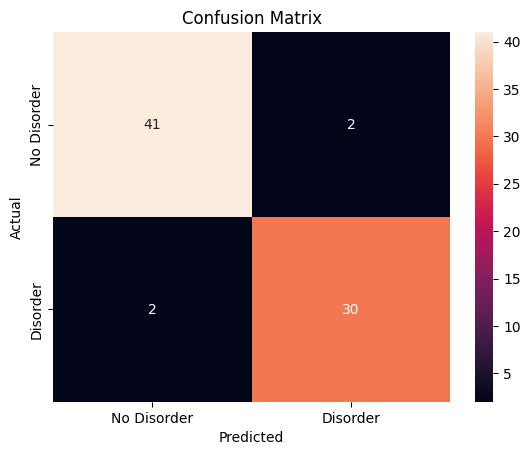

In [336]:
#Heatmap of the confusion matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=["No Disorder", "Disorder"],
            yticklabels=["No Disorder", "Disorder"])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

ROC AUC: 0.9473110465116278


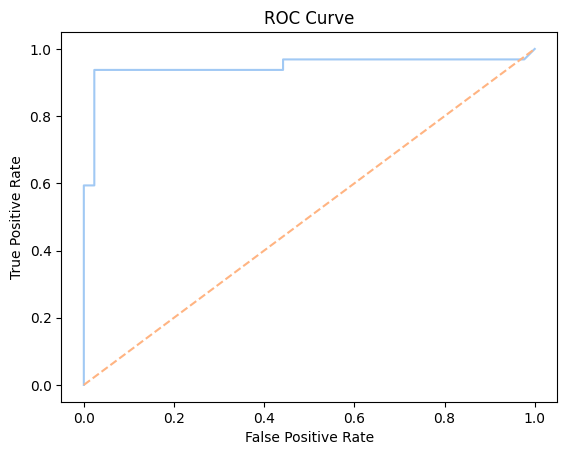

In [337]:
#ROC AUC Score
y_prob = model.predict_proba(X_test)[:, 1]
print("ROC AUC:", roc_auc_score(y_test, y_prob))


#ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


## 5. Feature Importance Analysis

Logistic Regression coefficients indicate how each feature contributes to the likelihood of having a sleep disorder.

- Positive coefficients increase the probability of a disorder
- Negative coefficients decrease the probability

The feature contribution plot indicates that higher blood pressure, BMI, and age increase the likelihood of sleep disorders, whereas better sleep quality and physical activity reduce the risk.

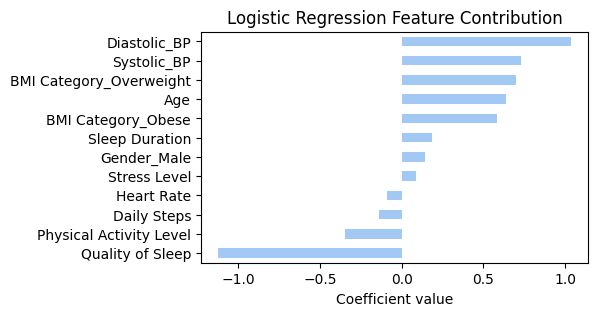

In [338]:
# Logistic Regression feature importance
log_reg_importance = pd.Series(
    model.coef_[0],
    index=X.columns
)

log_reg_importance_sorted = log_reg_importance.sort_values()

plt.figure(figsize=(5,3))
log_reg_importance_sorted.plot(kind="barh")
plt.title("Logistic Regression Feature Contribution")
plt.xlabel("Coefficient value")
plt.show()

# Conclusion

This project analyzed sleep health and lifestyle factors using exploratory data analysis and logistic regression. The model achieved strong performance in predicting sleep disorders, with high accuracy and ROC-AUC score.

Blood pressure, BMI, and age were identified as major risk factors, while better sleep quality and physical activity showed protective effects.